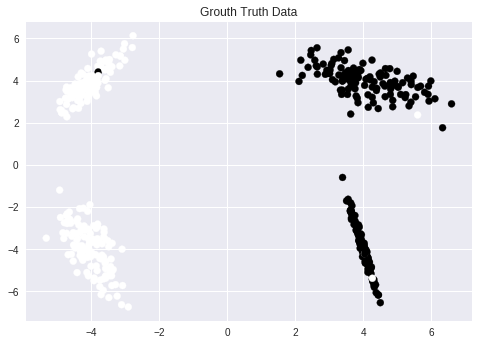


------- Case 1: Pure neural network --------------

------- Case 2: Decoupled Neural Interface ----------------

- Case 3: Pure neural network + gradient Noise ---

- Case 4: Decoupled Neural Interface + gradient Noise ------

------- Final Compare -------
Case 1 Pure neural network cost :  63.32431128747157
Case 2 Decoupled Neural Interfaces cost :  62.85113733058702
Case 3 Pure neural network + gradient Noise cost :  63.3245700771321
Case 4 Decoupled Neural Interfaces cost + gradient Noise :  61.76735648289343


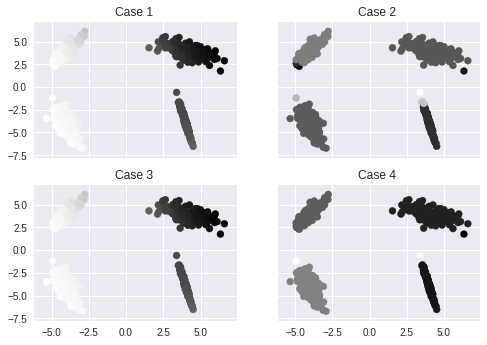

In [1]:

import numpy as np,sys,time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
np.random.seed(4567)

def log(x):
    return 1  / ( 1 + np.exp(-1*x))
def d_log(x):
    return log(x) * ( 1- log(x))

# 0. Generate Training Data
X, Y = make_classification(n_samples=500,n_features=2,class_sep=4, n_repeated = 0,n_redundant=0, n_classes=2,n_informative=2,n_clusters_per_class=2)
Y = np.expand_dims(Y,axis=1)
plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y))
plt.title('Grouth Truth Data')
plt.show()
time.sleep(2)

# 1. Declare Hyper Parameters
num_epoch = 100
learning_rate = 0.00008
n_value = 0.1

# 2. Create Weigths and copy them to have the same values
w1 = (np.random.randn(2,10) * 0.2) - 0.1
w2 = (np.random.randn(10,28) * 0.2) - 0.1
w3 = (np.random.randn(28,1) * 0.2) - 0.1

w1_DNI = (np.random.randn(10,10) * 0.2) - 0.1
w2_DNI =  (np.random.randn(28,28) * 0.2) - 0.1
w3_DNI = (np.random.randn(1,1) * 0.2) - 0.1

w1_syth = w1_DNI
w2_syth = w2_DNI
w3_syth = w3_DNI

w1_syth_noise = w1_DNI
w2_syth_noise = w2_DNI
w3_syth_noise = w3_DNI

w1_nn,w2_nn,w3_nn = w1,w2,w3
w1_DN,w2_DN,w3_DN = w1,w2,w3
w1_nn_noise,w2_nn_noise,w3_nn_noise = w1,w2,w3
w1_DN_noise,w2_DN_noise,w3_DN_noise = w1,w2,w3

# ============================================
print("\n------- Case 1: Pure neural network --------------")
for iter in range(num_epoch):
    
    layer_1 = X.dot(w1_nn)
    layer_1_act = log(layer_1)

    layer_2 = layer_1_act.dot(w2_nn)
    layer_2_act = log(layer_2)

    layer_3 = layer_2_act.dot(w3_nn)
    layer_3_act = log(layer_3)

    cost = np.square(layer_3_act - Y).sum() * 0.5
    #print("Current Iter : ", iter, " current cost : ", cost,end="\r")

    grad_3_part_1 = layer_3_act - Y
    grad_3_part_2 = d_log(layer_3)
    grad_3_part_3 = layer_2_act
    grad_3 =    grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)

    grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_nn.T)
    grad_2_part_2 = d_log(layer_2)
    grad_2_part_3 = layer_1_act
    grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

    grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_nn.T)
    grad_1_part_2 = d_log(layer_1)
    grad_1_part_3 = X
    grad_1 =    grad_1_part_3.T.dot(grad_1_part_1 * grad_1_part_2)

    w1_nn = w1_nn - learning_rate * grad_1
    w2_nn = w2_nn - learning_rate * grad_2
    w3_nn = w3_nn - learning_rate * grad_3
# ============================================
print("\n------- Case 2: Decoupled Neural Interface ----------------")
for iter in range(num_epoch):
    
    # ------ Normal Layer 1 ---------
    layer_1 = X.dot(w1_DN)
    layer_1_act = log(layer_1)
    # ------ Normal Layer 1 ---------
    # ------ Sythn Layer 1 ---------
    syth_grad_1_part_1 = layer_1_act.dot(w1_syth)
    syth_grad_1_part_2 = d_log(layer_1)
    syth_grad_1_part_3 = X
    syth_grad_1 =   syth_grad_1_part_3.T.dot(syth_grad_1_part_1 * syth_grad_1_part_2)

    w1_DN = w1_DN + learning_rate * syth_grad_1
    # ------ Sythn Layer 1 ---------
    

    # ------ Normal Layer 2 ---------
    layer_2 = layer_1_act.dot(w2_DN)
    layer_2_act = log(layer_2)
    # ------ Normal Layer 2 ---------
    # ------ Sythn Layer  2---------
    syth_grad_2_part_1 = layer_2_act.dot(w2_syth)
    syth_grad_2_part_2 = d_log(layer_2)
    syth_grad_2_part_3 = layer_1_act
    syth_grad_2 =   syth_grad_2_part_3.T.dot(syth_grad_2_part_1 * syth_grad_2_part_2)

    w2_DN = w2_DN + learning_rate * syth_grad_2
    layer_2_delta = (syth_grad_2_part_1 * syth_grad_2_part_2).dot(w2_DN.T)
    # ------ Sythn Layer  2 ---------
    # ------ Layer 1 Groud Truth Weight Update -----
    syth_gt_grad_1_part_1 = syth_grad_1_part_1 - layer_2_delta
    syth_gt_grad_1_part_2 = layer_1_act
    syth_gt_grad_1 = syth_gt_grad_1_part_2.T.dot(syth_gt_grad_1_part_1)
    w1_syth = w1_syth + learning_rate * syth_gt_grad_1
    # ------ Layer 1 Groud Truth Weight Update -----


    # ------ Normal Layer 3 ---------
    layer_3 = layer_2_act.dot(w3_DN)
    layer_3_act = log(layer_3)
    # ------ Normal Layer 3 ---------
    # ------ Sythn Layer  3---------
    syth_grad_3_part_1 = layer_3_act.dot(w3_syth)
    syth_grad_3_part_2 = d_log(layer_3)
    syth_grad_3_part_3 = layer_2_act
    syth_grad_3 =   syth_grad_3_part_3.T.dot(syth_grad_3_part_1 * syth_grad_3_part_2)

    w3_DN = w3_DN + learning_rate * syth_grad_3
    layer_3_delta = (syth_grad_3_part_1 * syth_grad_3_part_2).dot(w3_DN.T)
    # ------ Sythn Layer  3 ---------
    # ------ Layer 2 Groud Truth Weight Update -----
    syth_gt_grad_2_part_1 = syth_grad_2_part_1 - layer_3_delta
    syth_gt_grad_2_part_2 = layer_2_act
    syth_gt_grad_2 = syth_gt_grad_2_part_2.T.dot(syth_gt_grad_2_part_1)
    w2_syth = w2_syth + learning_rate * syth_gt_grad_2
    # ------ Layer 3 Groud Truth Weight Update -----

    cost = np.square(layer_3_act - Y).sum() * 0.5
    #print("Current Iter : ", iter, " current cost : ", cost,end="\r")

    # ------ Layer 3 Groud Truth Weight Update -----
    syth_gt_grad_3_part_1 = syth_grad_3_part_1 - (layer_3_act - Y)
    syth_gt_grad_3_part_2 = layer_3_act
    syth_gt_grad_3 = syth_gt_grad_3_part_2.T.dot(syth_gt_grad_3_part_1)
    w3_syth = w3_syth + learning_rate * syth_gt_grad_3
    # ------ Layer 3 Groud Truth Weight Update -----
# ============================================
print("\n- Case 3: Pure neural network + gradient Noise ---")
for iter in range(num_epoch):
    
    layer_1 = X.dot(w1_nn_noise)
    layer_1_act = log(layer_1)

    layer_2 = layer_1_act.dot(w2_nn_noise)
    layer_2_act = log(layer_2)

    layer_3 = layer_2_act.dot(w3_nn_noise)
    layer_3_act = log(layer_3)

    cost = np.square(layer_3_act - Y).sum() * 0.5
    #print("Current Iter : ", iter, " current cost : ", cost,end="\r")

    grad_3_part_1 = layer_3_act - Y
    grad_3_part_2 = d_log(layer_3)
    grad_3_part_3 = layer_2_act
    grad_3 =    grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)

    grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_nn_noise.T)
    grad_2_part_2 = d_log(layer_2)
    grad_2_part_3 = layer_1_act
    grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

    grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_nn_noise.T)
    grad_1_part_2 = d_log(layer_1)
    grad_1_part_3 = X
    grad_1 =    grad_1_part_3.T.dot(grad_1_part_1 * grad_1_part_2)

    # ------ Calculate The Additive Noise -------
    ADDITIVE_NOISE_STD = n_value / (np.power((1 + iter), 0.55))
    ADDITIVE_GAUSSIAN_NOISE = np.random.normal(loc=0,scale=ADDITIVE_NOISE_STD)
    # ------ Calculate The Additive Noise -------

    w1_nn_noise = w1_nn_noise - learning_rate * (grad_1+ ADDITIVE_GAUSSIAN_NOISE)
    w2_nn_noise = w2_nn_noise - learning_rate * (grad_2+ ADDITIVE_GAUSSIAN_NOISE)
    w3_nn_noise = w3_nn_noise - learning_rate * (grad_3+ ADDITIVE_GAUSSIAN_NOISE)
# ============================================
print("\n- Case 4: Decoupled Neural Interface + gradient Noise ------")
for iter in range(num_epoch):

    # ------ Calculate The Additive Noise -------
    ADDITIVE_NOISE_STD = n_value / (np.power((1 + iter), 0.55))
    ADDITIVE_GAUSSIAN_NOISE = np.random.normal(loc=0,scale=ADDITIVE_NOISE_STD)
    # ------ Calculate The Additive Noise -------

    # ------ Normal Layer 1 ---------
    layer_1 = X.dot(w1_DN_noise)
    layer_1_act = log(layer_1)
    # ------ Normal Layer 1 ---------
    # ------ Sythn Layer 1 ---------
    syth_grad_1_part_1 = layer_1_act.dot(w1_syth_noise)
    syth_grad_1_part_2 = d_log(layer_1)
    syth_grad_1_part_3 = X
    syth_grad_1 =   syth_grad_1_part_3.T.dot(syth_grad_1_part_1 * syth_grad_1_part_2)

    w1_DN_noise = w1_DN_noise + learning_rate * (syth_grad_1+ADDITIVE_GAUSSIAN_NOISE)
    # ------ Sythn Layer 1 ---------
    

    # ------ Normal Layer 2 ---------
    layer_2 = layer_1_act.dot(w2_DN_noise)
    layer_2_act = log(layer_2)
    # ------ Normal Layer 2 ---------
    # ------ Sythn Layer  2---------
    syth_grad_2_part_1 = layer_2_act.dot(w2_syth_noise)
    syth_grad_2_part_2 = d_log(layer_2)
    syth_grad_2_part_3 = layer_1_act
    syth_grad_2 =   syth_grad_2_part_3.T.dot(syth_grad_2_part_1 * syth_grad_2_part_2)

    w2_DN_noise = w2_DN_noise + learning_rate * (syth_grad_2+ADDITIVE_GAUSSIAN_NOISE)
    layer_2_delta = (syth_grad_2_part_1 * syth_grad_2_part_2).dot(w2_DN.T)
    # ------ Sythn Layer  2 ---------
    # ------ Layer 1 Groud Truth Weight Update -----
    syth_gt_grad_1_part_1 = syth_grad_1_part_1 - layer_2_delta
    syth_gt_grad_1_part_2 = layer_1_act
    syth_gt_grad_1 = syth_gt_grad_1_part_2.T.dot(syth_gt_grad_1_part_1)
    w1_syth_noise = w1_syth_noise + learning_rate * (syth_gt_grad_1+ADDITIVE_GAUSSIAN_NOISE)
    # ------ Layer 1 Groud Truth Weight Update -----


    # ------ Normal Layer 3 ---------
    layer_3 = layer_2_act.dot(w3_DN_noise)
    layer_3_act = log(layer_3)
    # ------ Normal Layer 3 ---------
    # ------ Sythn Layer  3---------
    syth_grad_3_part_1 = layer_3_act.dot(w3_syth_noise)
    syth_grad_3_part_2 = d_log(layer_3)
    syth_grad_3_part_3 = layer_2_act
    syth_grad_3 =   syth_grad_3_part_3.T.dot(syth_grad_3_part_1 * syth_grad_3_part_2)

    w3_DN_noise = w3_DN_noise + learning_rate * (syth_grad_3+ADDITIVE_GAUSSIAN_NOISE)
    layer_3_delta = (syth_grad_3_part_1 * syth_grad_3_part_2).dot(w3_DN.T)
    # ------ Sythn Layer  3 ---------
    # ------ Layer 2 Groud Truth Weight Update -----
    syth_gt_grad_2_part_1 = syth_grad_2_part_1 - layer_3_delta
    syth_gt_grad_2_part_2 = layer_2_act
    syth_gt_grad_2 = syth_gt_grad_2_part_2.T.dot(syth_gt_grad_2_part_1)
    w2_syth_noise = w2_syth_noise + learning_rate * (syth_gt_grad_2+ADDITIVE_GAUSSIAN_NOISE)
    # ------ Layer 3 Groud Truth Weight Update -----

    cost = np.square(layer_3_act - Y).sum() * 0.5
    #print("Current Iter : ", iter, " current cost : ", cost,end="\r")

    # ------ Layer 3 Groud Truth Weight Update -----
    syth_gt_grad_3_part_1 = syth_grad_3_part_1 - (layer_3_act - Y)
    syth_gt_grad_3_part_2 = layer_3_act
    syth_gt_grad_3 = syth_gt_grad_3_part_2.T.dot(syth_gt_grad_3_part_1)
    w3_syth_noise = w3_syth_noise + learning_rate * (syth_gt_grad_3+ADDITIVE_GAUSSIAN_NOISE)
    # ------ Layer 3 Groud Truth Weight Update -----
# ============================================




# ============================================
print("\n------- Final Compare -------")
layer_1 = X.dot(w1_nn)
layer_1_act = log(layer_1)
layer_2 = layer_1_act.dot(w2_nn)
layer_2_act = log(layer_2)
layer_3 = layer_2_act.dot(w3_nn)
layer_3_act_1 = log(layer_3)
cost = np.square(layer_3_act_1 - Y).sum() * 0.5
print("Case 1 Pure neural network cost : ",cost)


layer_1 = X.dot(w1_DN)
layer_1_act = log(layer_1)
layer_2 = layer_1_act.dot(w2_DN)
layer_2_act = log(layer_2)
layer_3 = layer_2_act.dot(w3_DN)
layer_3_act_2 = log(layer_3)
cost = np.square(layer_3_act_2 - Y).sum() * 0.5
print("Case 2 Decoupled Neural Interfaces cost : ",cost)


layer_1 = X.dot(w1_nn_noise)
layer_1_act = log(layer_1)
layer_2 = layer_1_act.dot(w2_nn_noise)
layer_2_act = log(layer_2)
layer_3 = layer_2_act.dot(w3_nn_noise)
layer_3_act_3 = log(layer_3)
cost = np.square(layer_3_act_3 - Y).sum() * 0.5
print("Case 3 Pure neural network + gradient Noise cost : ",cost)


layer_1 = X.dot(w1_DN_noise)
layer_1_act = log(layer_1)
layer_2 = layer_1_act.dot(w2_DN_noise)
layer_2_act = log(layer_2)
layer_3 = layer_2_act.dot(w3_DN_noise)
layer_3_act_4 = log(layer_3)
cost = np.square(layer_3_act_4 - Y).sum() * 0.5
print("Case 4 Decoupled Neural Interfaces cost + gradient Noise : ",cost)
# ============================================


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(X[:,0],X[:,1],c = np.squeeze(layer_3_act_1))
ax1.set_title('Case 1 ')
ax2.scatter(X[:,0],X[:,1],c = np.squeeze(layer_3_act_2))
ax2.set_title('Case 2 ')
ax3.scatter(X[:,0],X[:,1],c = np.squeeze(layer_3_act_3))
ax3.set_title('Case 3 ')
ax4.scatter(X[:,0],X[:,1],c = np.squeeze(layer_3_act_4))
ax4.set_title('Case 4 ')
plt.show()
